In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from GaussianProcess import GaussianProcess
from model_selection import fix_random_seed, train_test_split
from preprocessing import ExponentialTransformer, MinMaxScaler, StandardScaler

SEED = 42
fix_random_seed(SEED)

In [2]:
data = pd.read_table('ageIncome.txt', sep='\t', index_col=0)

<Axes: xlabel='age', ylabel='log.income'>

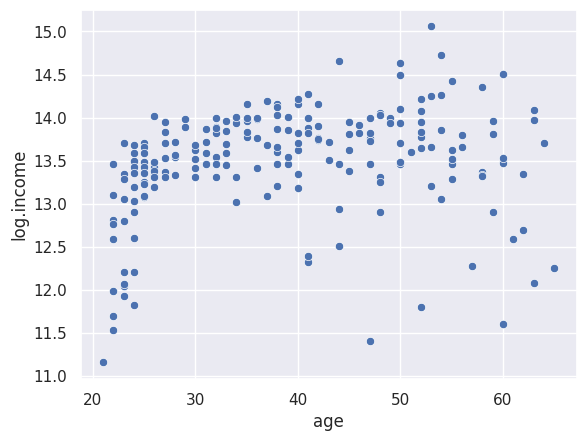

In [3]:
sns.scatterplot(data=data, x='age', y='log.income')

In [5]:
ExponentialTransformer().fit_transform(data['log.income'])

1       1.000000
2       5.242508
3       6.956664
4       1.714120
5       1.457030
         ...    
201    16.641507
202     2.514063
203    18.827150
204    12.857149
205     2.999963
Name: log.income, Length: 205, dtype: float64

In [10]:
# split data into valing, validation and test set
train, val = train_test_split(data, test_size=0.5, random_state=SEED)
val, test = train_test_split(val, test_size=0.1, random_state=SEED)

X_train = train['age'].values
y_train = train['log.income'].values
X_val = val['age'].values
y_val = val['log.income'].values
X_test = test['age'].values
y_test = test['log.income'].values

# fit Gaussian process to valing data
gp = GaussianProcess(theta=0.5, noise=0.1)

gp.fit(X_train, y_train)

# optimize kernel parameter theta and noise parameter noise using the validation set
gp.optimize(X_val, y_val)

train_zeta, _ = gp.predict(X_train)
val_zeta, _ = gp.predict(X_val)
test_zeta, _ = gp.predict(X_test)

Text(0, 0.5, 'Log income')

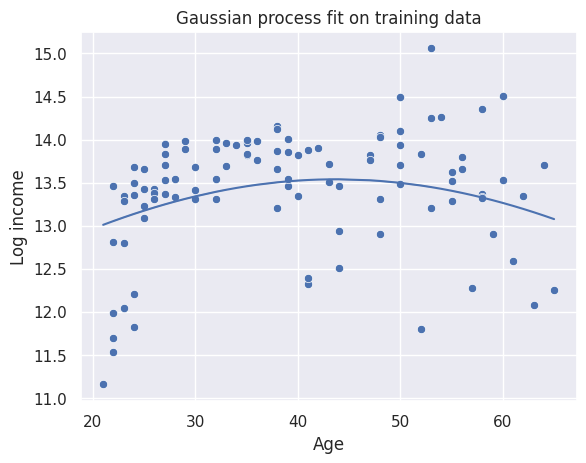

In [13]:
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten())
sns.lineplot(x=X_train.flatten(), y=train_zeta.flatten())
plt.title('Gaussian process fit on training data')
plt.xlabel('Age')
plt.ylabel('Log income')

Text(0, 0.5, 'Log income')

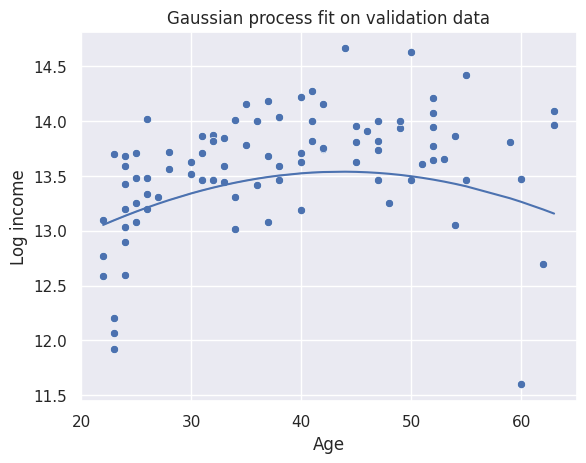

In [14]:
sns.scatterplot(x=X_val.flatten(), y=y_val.flatten())
sns.lineplot(x=X_val.flatten(), y=val_zeta.flatten())
plt.title('Gaussian process fit on validation data')
plt.xlabel('Age')
plt.ylabel('Log income')

In [13]:
# transform data

transformer = ExponentialTransformer()
# transformer.fit(X_train)
# X_train_transformed = transformer.transform(X_train)
# X_val_transformed = transformer.transform(X_val)
# X_test_transformed = transformer.transform(X_test)

transformer.fit(y_train)
y_train_transformed = transformer.transform(y_train)
y_val_transformed = transformer.transform(y_val)
y_test_transformed = transformer.transform(y_test)

scaler = MinMaxScaler()
# scaler.fit(X_train_transformed)
# X_train_transformed = scaler.transform(X_train_transformed)
# X_val_transformed = scaler.transform(X_val_transformed)
# X_test_transformed = scaler.transform(X_test_transformed)

scaler.fit(y_train_transformed)
y_train_transformed = scaler.transform(y_train_transformed)
y_val_transformed = scaler.transform(y_val_transformed)
y_test_transformed = scaler.transform(y_test_transformed)

# fit Gaussian process to valing data
gp = GaussianProcess(theta=0.5, noise=0.1)

gp.fit(X_train, y_train_transformed)

gp.optimize(X_val, y_val_transformed)

train_zeta, _ = gp.predict(X_train)
val_zeta, _ = gp.predict(X_val)
test_zeta, _ = gp.predict(X_test)

Text(0, 0.5, 'Log income')

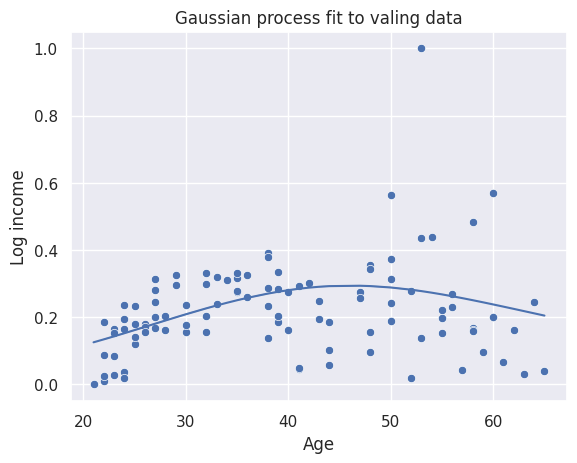

In [14]:
sns.scatterplot(x=X_train.flatten(), y=y_train_transformed.flatten())
sns.lineplot(x=X_train.flatten(), y=train_zeta.flatten())
plt.title('Gaussian process fit to valing data')
plt.xlabel('Age')
plt.ylabel('Log income')

Text(0, 0.5, 'Log income')

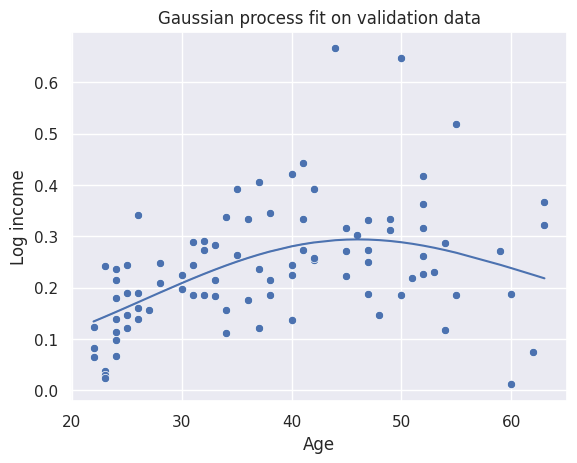

In [15]:
sns.scatterplot(x=X_val.flatten(), y=y_val_transformed.flatten())
sns.lineplot(x=X_val.flatten(), y=val_zeta.flatten())
plt.title('Gaussian process fit on validation data')
plt.xlabel('Age')
plt.ylabel('Log income')

In [21]:
print(gp.theta, gp.noise)

33.54388317998659 0.7357903181991038
